In [8]:
import os
import math
from collections import defaultdict
from typing import List 

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

color_pallette = 'muted'
sns.set_theme(style='whitegrid', font_scale=2, palette=color_pallette, 
              rc={'font.family': 'serif', 'font.serif': 'Times New Roman', 'mathtext.fontset': 'dejavuserif'})

In [15]:
PROJECT_FOLDER = os.path.dirname(os.path.abspath(''))
DATA_FOLDER = os.path.join(PROJECT_FOLDER, 'data')

titlesize = 22

cols_to_display = ['full_name', 'name', 'accuracy', 'macro avg_f1-score', 'macro avg_recall', 'macro avg_precision']

def manage_model_name(name: str) -> str:
    spl = name.split('/')
    if len(spl) == 2:
        name = spl[1]
    
    names_dict = {
        'MLP-fasttext_skipgram-model_train_base_skip': 'MLP - Tripadvisor fastText',
        'herbert-base-cased': 'HerBERT', 
        'roberta-polish-kgr10': 'KGR10-RoBERTa'
    }
    if name in names_dict:
        name = names_dict[name]
    
    return name

def load_df(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    df['name'] = df['name'].apply(lambda x: manage_model_name(x))
    return df

def visualize_results(df: pd.DataFrame, suptitle: str = ''):               
    id_cols = ['name']   
    measures_to_plot = ['accuracy', 'macro avg_f1-score', 'macro avg_recall', 'macro avg_precision']
    measures_to_plot_title = {
        'accuracy': 'Dokładność',
        'macro avg_f1-score': 'Makro F1',
        'macro avg_recall': 'Makro czułość',
        'macro avg_precision': 'Makro precyzja'
    }
    df_measures = pd.melt(df, id_vars=id_cols, value_vars=measures_to_plot)
    
    fig, ax1 = plt.subplots(figsize=(12, 5), constrained_layout=True)     
    sns.barplot(x='variable', y='value', hue='name', edgecolor="0",
                ci='sd', errwidth=1.25, capsize=0.075, data=df_measures, ax=ax1)
    
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    ax1.set_ylim(bottom=round(df_measures['value'].min()-0.02, 2),
                 top=round(df_measures['value'].max()+0.02, 2))

    x_ticks_labels = [measures_to_plot_title[col] for col in measures_to_plot]
    ax1.set_xticklabels(x_ticks_labels)
    ax1.set_xlabel('Miara')
    ax1.set_ylabel('Wartość')
    
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, title='Model', bbox_to_anchor=(1.02, 0.9), loc=2, borderaxespad=0.)
    ax1.get_legend().remove()
    
    file_name = suptitle + '.pdf'
    fig.savefig(file_name, bbox_inches='tight')    

# Rezultaty

In [16]:
file_name = 'results_lista_3.csv'
file_path = os.path.join(DATA_FOLDER, file_name)

df = load_df(file_path)

with pd.option_context('display.max_columns', None):
    display(df)

,full_name,name,accuracy,z_amb_precision,z_amb_recall,z_amb_f1-score,z_amb_support,z_minus_m_precision,z_minus_m_recall,z_minus_m_f1-score,z_minus_m_support,z_plus_m_precision,z_plus_m_recall,z_plus_m_f1-score,z_plus_m_support,z_zero_precision,z_zero_recall,z_zero_f1-score,z_zero_support,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support
0,MLP-fasttext_skipgram-model_train_base_skip-run-1,MLP - Tripadvisor fastText,0.747284,0.528302,0.390244,0.448898,287,0.747289,0.867377,0.802867,1033,0.783712,0.810773,0.797013,724,0.806154,0.594104,0.684073,441,0.716364,0.665625,0.683213,2485,0.743056,0.747284,0.739199,2485
1,allegro/herbert-base-cased_finetuned-run-1,HerBERT,0.852314,0.727642,0.623693,0.671670,287,0.853982,0.934172,0.892279,1033,0.874324,0.893646,0.883880,724,0.886179,0.741497,0.807407,441,0.835532,0.798252,0.813809,2485,0.851031,0.852314,0.849291,2485
2,clarin-pl/roberta-polish-kgr10_finetuned-run-1,KGR10-RoBERTa,0.817304,0.707965,0.557491,0.623782,287,0.811795,0.906099,0.856359,1033,0.869132,0.843923,0.856342,724,0.803970,0.734694,0.767773,441,0.798216,0.760552,0.776064,2485,0.815120,0.817304,0.813772,2485


In [17]:
df[cols_to_display]

,full_name,name,accuracy,macro avg_f1-score,macro avg_recall,macro avg_precision
0,MLP-fasttext_skipgram-model_train_base_skip-run-1,MLP - Tripadvisor fastText,0.747284,0.683213,0.665625,0.716364
1,allegro/herbert-base-cased_finetuned-run-1,HerBERT,0.852314,0.813809,0.798252,0.835532
2,clarin-pl/roberta-polish-kgr10_finetuned-run-1,KGR10-RoBERTa,0.817304,0.776064,0.760552,0.798216


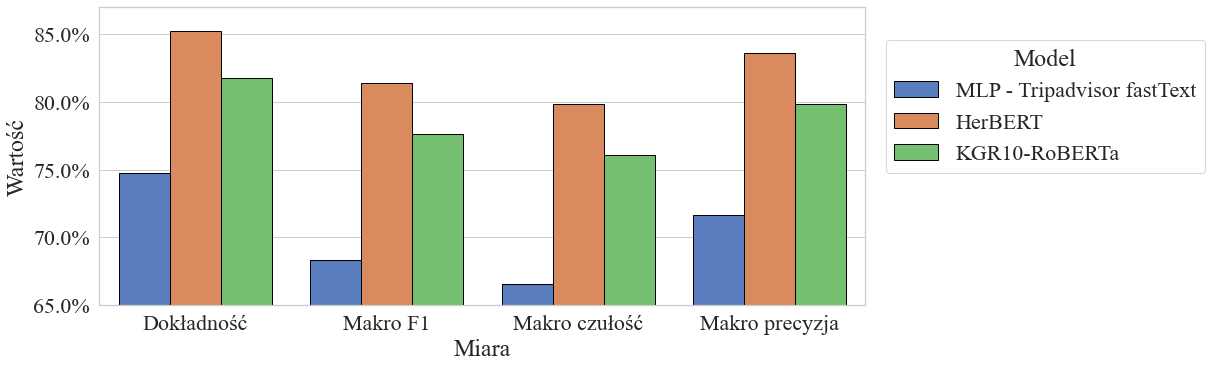

In [18]:
visualize_results(df, suptitle='Wyniki - lista3')

In [34]:
measure_cols = ['accuracy', 'macro avg_f1-score', 'z_plus_m_f1-score', 'z_amb_f1-score',
           'z_zero_f1-score', 'z_minus_m_f1-score']
df2 = df[['name'] + measure_cols].copy()
df2['name'] = df2['name'].apply(lambda x: x.replace('_',' '))

for col in measure_cols:
    df2[col] = df2[col].apply(lambda x: str(round(100*x, 2)))

df2 = df2.groupby(['name'], as_index=False, sort=False).mean()

df2 = df2.rename(columns={
    'name': 'Metoda',
    'accuracy': 'Dokładność', 'macro avg_f1-score': 'Makro F1',
    'z_plus_m_f1-score': 'SP', 'z_amb_f1-score': 'AMB',
    'z_zero_f1-score': '0', 'z_minus_m_f1-score': 'SN'
})

display(df2)
df2.to_csv('f1_results_lista_3.csv', index=False, encoding='utf-8')

,Metoda,Dokładność,Makro F1,SP,AMB,0,SN
0,MLP - Tripadvisor fastText,74.73,68.32,79.70,44.89,68.41,80.29
1,HerBERT,85.23,81.38,88.39,67.17,80.74,89.23
2,KGR10-RoBERTa,81.73,77.61,85.63,62.38,76.78,85.64
